#### Regresión lineal múltiple

Al explicarte cómo preparar la matriz de diseño del modelo ya te hemos adelantado que podemos incluir todas las variables explicativas que deseemos. No va a existir ninguna diferencia a nivel de las operaciones a realizar.

Para demostrarlo, ajustemos un modelo para las ventas utilizando como predictores el gasto de publicidad en cada medio:

$$ Sales = \beta_0 + \beta_1 TV + \beta_2 Radio + \beta_3 Newspaper + \epsilon $$


In [ ]:
# Vector respuesta
y = ads['Sales']
# Matriz de variables explicativas del modelo
X = ads[['TV','Radio','Newspaper']]
# Añadimos un término constante a la matriz del modelo (b0)
X = sm.add_constant(X, prepend=False)

# Construimos el objeto modelo
# usamos un modelo lineal tipo OLS
# (Ordinary Least Squares)
model_mlin = sm.OLS(y, X)

# Ajustamos los parámetros del modelo
mlin_fitted = model_mlin.fit()

# Veamos el resumen del modelo ajustado
print(mlin_fitted.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 16 Jul 2019   Prob (F-statistic):           1.58e-96
Time:                        19:10:57   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0458      0.001     32.809      0.0

En modelos con múltiples predictores nos interesa ver relación parcial entre la variable respuesta y cada variable explicativa por separado, descontando el efecto de las demás variables exógenas. Statsmodels también nos facilita este análisis de forma gráfica.

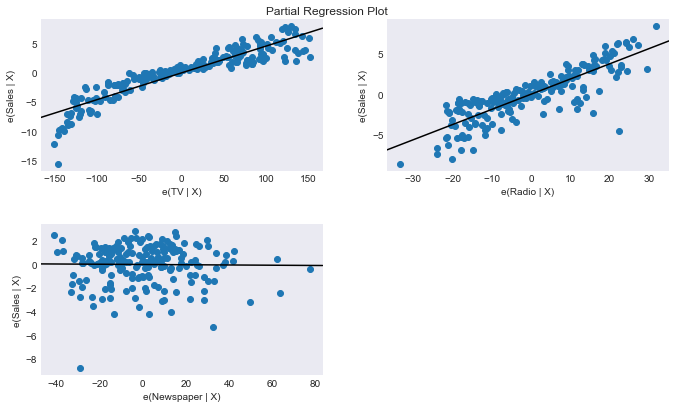

In [ ]:
fig = plt.figure()
fig = sm.graphics.plot_partregress_grid(mlin_fitted, ['TV','Radio','Newspaper']).set_size_inches(10, 6)